## Importing the libraries

In [30]:
'''Main'''
import numpy as np
import pandas as pd
import os
import pyodbc

'''Data Viz'''
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
import matplotlib as mpl
import getpass
from pylab import rcParams
from scipy import stats
%matplotlib inline
pd.set_option('display.float_format', lambda x: '%.3f' % x)

## What is a Term Deposit?

A Term deposit is a deposit that a bank or a financial institurion offers with a fixed rate (often better than just opening deposit account) in which your money will be returned back at a specific maturity time.
(https://www.investopedia.com/terms/t/termdeposit.asp)

## Loading the datasets

In [31]:
df = pd.read_csv("C:/Users/eddie/Desktop/Exams/Exam 805/Python/bank_additional_full_2.csv",sep =',')
df.head()

,Unnamed: 0,Unnamed: 0.1,age,job,marital,education,default,housing,loan,contact,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,0,0,56,housemaid,married,basic.4y,no,no,no,telephone,...,1,999,0,nonexistent,1.100,93.994,-36.400,4.857,5191.000,no
1,1,1,57,services,married,high.school,unknown,no,no,telephone,...,1,999,0,nonexistent,1.100,93.994,-36.400,4.857,5191.000,no
2,2,2,37,services,married,high.school,no,yes,no,telephone,...,1,999,0,nonexistent,1.100,93.994,-36.400,4.857,5191.000,no
3,3,3,40,admin.,married,basic.6y,no,no,no,telephone,...,1,999,0,nonexistent,1.100,93.994,-36.400,4.857,5191.000,no
4,4,4,56,services,married,high.school,no,no,yes,telephone,...,1,999,0,nonexistent,1.100,93.994,-36.400,4.857,5191.000,no


In [32]:
df.shape

(7908096, 23)

# Company information 

There has been a revenue decline for the Portuguese bank and they would like to know what actions to take. After investigation, we found out that the root cause is that their clients are not depositing as frequently as before. Knowing that term deposits allow banks to hold onto a deposit for a specific amount of time, so banks can invest in higher gain financial products to make a profit. In addition, banks also hold better chance to persuade term deposit clients into buying other products such as funds or insurance to further increase their revenues. As a result, the Portuguese bank would like to identify existing clients that have higher chance to subscribe for a term deposit and focus marketing effort on such clients.

## Datasets
* It is a dataset that describing Portugal bank marketing campaigns results.Conducted campaigns were based mostly on direct phone calls, offering bank client to place a term deposit. If after all marking afforts client had agreed to place deposit - target variable marked 'yes', otherwise 'no'

Source of the data: https://archive.ics.uci.edu/ml/datasets/bank+marketing

## Banking Marketing Campaign data
* Technical aspects of the data.


* The dataset was downloaded from Kaggle in Comma-separate Values (CSV) format.
* The dataset have 7 908 096 rows of loan application that was appcated by the bank with 22 features.
* The size of dataset was 2.2 GB for appcated loans applications.

## Attributes Description:

For the propose of this assignment will pick up 5 columns to analysis as the
table is too wide to analysis all 21 columns.

### Bank client data:

* 1 - age: (numeric)
* 2 - job: type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
* 3 - marital: marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
* 4 - education: (categorical: primary, secondary, tertiary and unknown)
* 5 - default: has credit in default? (categorical: 'no','yes','unknown')
* 6 - housing: has housing loan? (categorical: 'no','yes','unknown')
* 7 - loan: has personal loan? (categorical: 'no','yes','unknown')
* 8 - balance: Balance of the individual.

###  Related with the last contact of the current campaign:

* 8 - contact: contact communication type (categorical: 'cellular','telephone')
* 9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', apr, may, jun, jul, aug, sep, oct, 'nov', 'dec')
* 10 - day: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
* 11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

### other attributes:

* 12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
* 13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
* 14 - previous: number of contacts performed before this campaign and for this client (numeric)
* 15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')


Output variable (desired target):
* 21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

## Data Cleaning - Analysis

In [35]:
def resumetable(df):
    print(f"Dataset Shape: {df.shape}")
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    
    summary['Total value'] = 7908096
    summary['Uniques'] = df.nunique().values
    summary['Missing/Blanks'] = df.isnull().sum().values    
    
    return summary

In [36]:
Data_Cleaning = resumetable(df)
Data_Cleaning

Dataset Shape: (7908096, 23)


,Name,dtypes,Total value,Uniques,Missing/Blanks
0,Unnamed: 0,int64,7908096,2636032,0
1,Unnamed: 0.1,int64,7908096,41188,0
2,age,int64,7908096,78,0
3,job,object,7908096,12,0
4,marital,object,7908096,4,0
5,education,object,7908096,8,0
6,default,object,7908096,3,0
7,housing,object,7908096,3,0
8,loan,object,7908096,3,0
9,contact,object,7908096,2,0


# Descriptive Statistics  (Analysis)

In [37]:
df.describe()

,Unnamed: 0,Unnamed: 0.1,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,7908096.000,7908096.000,7908096.000,7908096.000,7908096.000,7908096.000,7908096.000,7908096.000,7908096.000,7908096.000,7908096.000,7908096.000
mean,1318015.500,20593.500,40.024,258.285,2.568,962.475,0.173,0.082,93.576,-40.503,3.621,5167.036
std,760956.941,11889.952,10.421,259.276,2.770,186.909,0.495,1.571,0.579,4.628,1.734,72.251
min,0.000,0.000,17.000,0.000,1.000,0.000,0.000,-3.400,92.201,-50.800,0.634,4963.600
25%,659007.750,10296.750,32.000,102.000,1.000,999.000,0.000,-1.800,93.075,-42.700,1.344,5099.100
50%,1318015.500,20593.500,38.000,180.000,2.000,999.000,0.000,1.100,93.749,-41.800,4.857,5191.000
75%,1977023.250,30890.250,47.000,319.000,3.000,999.000,0.000,1.400,93.994,-36.400,4.961,5228.100
max,2636031.000,41187.000,98.000,4918.000,56.000,999.000,7.000,1.400,94.767,-26.900,5.045,5228.100


## Four V’s of big data.
Data Visualization.

The different ways you visualized your data.

I used Python programming language to visualize data. Python is free open source programming language.


### Python
* Seaborn - Is a free open source package that allows you to visualize Python data.
* Matplotlib - and again, Matplotlib is a free open source package that allows you to visualize Python data.

### The type of visualization we are going to use:
* Pie-chart - The pie chart is ideal for displaying proportional data or
percentages. Since the pie chart shows the size ratio between the parts
and the whole, the pieces must add up to a meaningful whole.

* Multiple bar chart - The Multiple bar chart is the most effective tool
for comparing objects and data across time. The column chart may
show several numbers on the X and Y axes, as well as a breakdown
by category on the Y axis.

### Volume

The collected more than 2.6 million observations of from previous marketing data (1.2 GB
of data) and every month on average they collected more than 20 thousand
observations of loan application.

In [38]:
df = pd.read_csv("C:/Users/eddie/Desktop/Exams/Exam 805/Python/bank_additional_full_results_week_day.csv",sep =',')

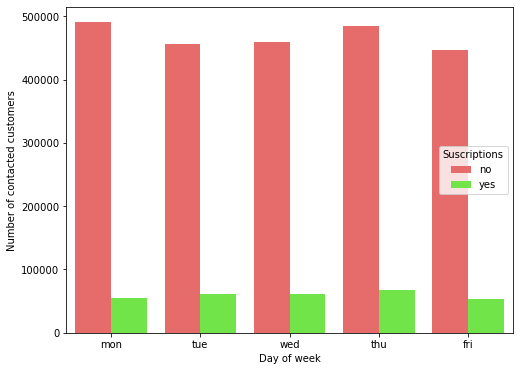

In [15]:
df["Suscriptions"] = df["y"]
# Show Plot
plt.figure(figsize=(8,6))
palette = ["#FA5858", "#64FE2E"]
ax = sns.barplot(x=df["day_of_week"], y=df["duration"],hue="Suscriptions", data=df, palette=palette, estimator=lambda x: len(x) )
ax.set(xlabel='Day of week', ylabel='Number of contacted customers')
plt.show()

The graph shows that on average 70 000 customers Open Term suscriptions on week days.

In [39]:
#df = pd.read_csv("C:/Users/eddie/Desktop/Exams/Exam 805/Python/bank_additional_full_results_month.csv",sep =',')

In [42]:
df.shape

(7908096, 23)

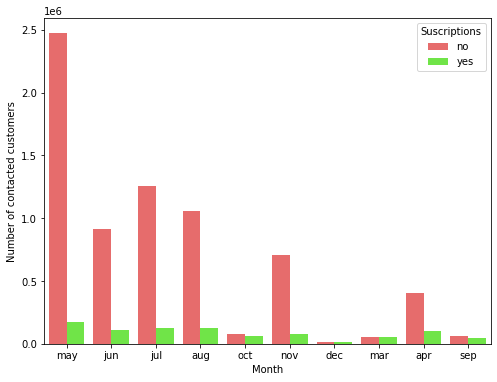

In [44]:
df["Suscriptions"] = df["y"]
plt.figure(figsize=(8,6))
palette = ["#FA5858", "#64FE2E"]
ax = sns.barplot(x=df["month"], y=df["duration"],hue=df["Suscriptions"], data=df, palette=palette, estimator=lambda x: len(x) )
ax.set(xlabel='Month', ylabel='Number of contacted customers')
plt.show()

The graph shows that more customers was target in May. Where the bank generated more data.

### Variety

The dataset is structured data which fit well in a relational database and
is easy to do data mining, storage and analyzing data. The data include
features like age, job, week_day, duration and deposit.
Data can be categorized in the following groups:

In [50]:
#df = pd.read_csv("C:/Users/eddie/Desktop/Exams/Exam 805/Python/bank_additional_full_results_job.csv",sep =',')

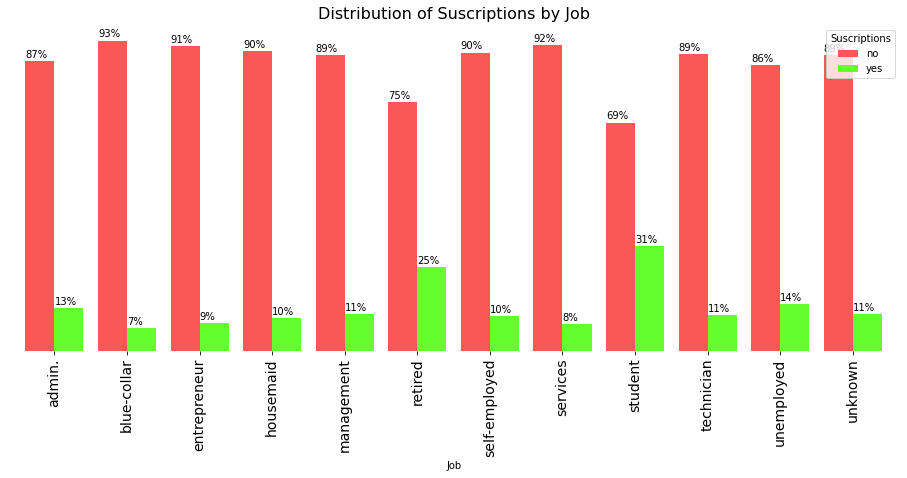

In [51]:
## Cross table
feature = pd.crosstab(df['job'],df['Suscriptions'],normalize='index')
##
colors_list = ["#FA5858", "#64FE2E"]
# Change this line to plot percentages instead of absolute values
ax = (feature.div(feature.sum(1), axis=0)).plot(kind='bar',stacked=False,figsize=(16,6),width = 0.8,color = colors_list)
plt.title("Distribution of Suscriptions by Job",fontsize= 16)
plt.xlabel('Job')

plt.xticks(fontsize=14)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.yticks([])

# Add this loop to add the annotations
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0%}'.format(height), (x, y + height + 0.01))

The graph shows that students and retired customers made more deposit compare to others job group.

In [52]:
# df = pd.read_csv("C:/Users/eddie/Desktop/Exams/Exam 805/Python/bank_additional_full_results_education.csv",sep =',')

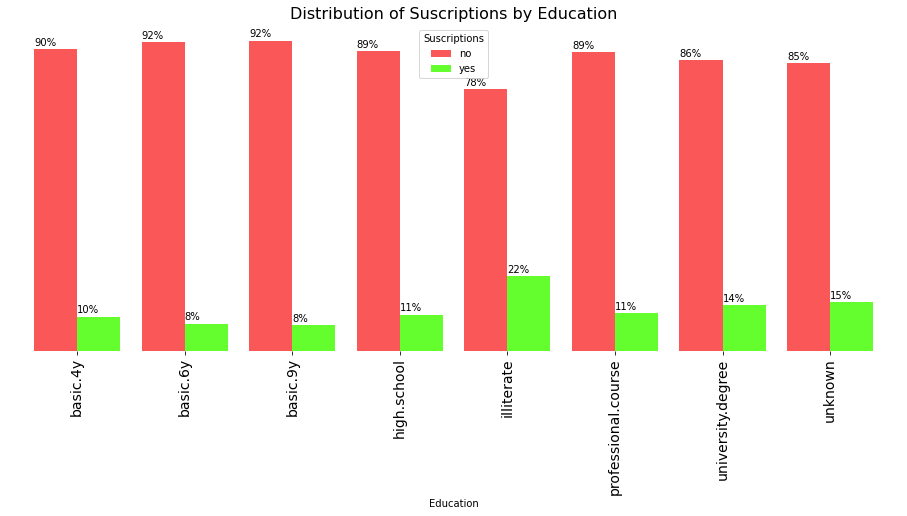

In [53]:
## Cross table
feature = pd.crosstab(df['education'],df['Suscriptions'],normalize='index')
##
colors_list = ["#FA5858", "#64FE2E"]
# Change this line to plot percentages instead of absolute values
ax = (feature.div(feature.sum(1), axis=0)).plot(kind='bar',stacked=False,figsize=(16,6),width = 0.8,color = colors_list)
plt.title("Distribution of Suscriptions by Education",fontsize= 16)
plt.xlabel('Education')

plt.xticks(fontsize=14)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.yticks([])

# Add this loop to add the annotations
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0%}'.format(height), (x, y + height + 0.01))

The graph shows that Illerate customers made more deposit compare to others education group.

### Veracity

The dataset assumes to be clean and accurate as it does not have missing data as
most of the data is collected at the application and they verify information
with internal parties to get feature other features.

In [54]:
Data_Cleaning = resumetable(df)
Data_Cleaning

Dataset Shape: (7908096, 24)


,Name,dtypes,Total value,Uniques,Missing/Blanks
0,Unnamed: 0,int64,7908096,2636032,0
1,Unnamed: 0.1,int64,7908096,41188,0
2,age,int64,7908096,78,0
3,job,object,7908096,12,0
4,marital,object,7908096,4,0
5,education,object,7908096,8,0
6,default,object,7908096,3,0
7,housing,object,7908096,3,0
8,loan,object,7908096,3,0
9,contact,object,7908096,2,0


### Value

The dataset generate value to the Bank Marketing Campaign as they do marketing campaign to get customers to make Term Deposit which is often better than just opening deposit account. as the money stay long in the bank.


In [55]:
#df = pd.read_csv("C:/Users/eddie/Desktop/Exams/Exam 805/Python/bank_additional_full_results_value.csv",sep =',')

<AxesSubplot:ylabel='y'>

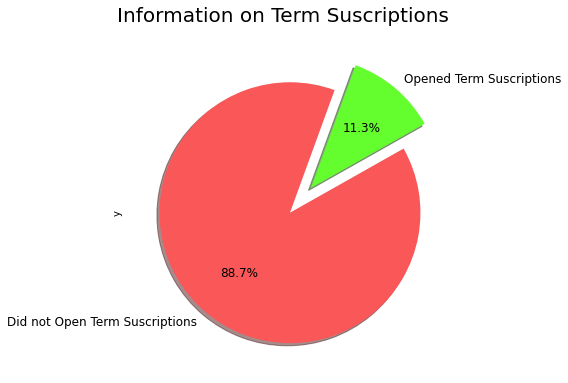

In [56]:
#f, ax = plt.subplots(2,figsize=(6,4))
plt.figure(figsize=(8,6))
colors = ["#FA5858", "#64FE2E"]
labels ="Did not Open Term Suscriptions", "Opened Term Suscriptions"

plt.suptitle('Information on Term Suscriptions', fontsize=20)
df["y"].value_counts().plot.pie(explode=[0,0.25], autopct='%1.1f%%',shadow=True, colors=colors, 
                                             labels=labels, fontsize=12, startangle=70)

The campaign was successful as 11.3% of opened the Term Suscription. which create value to the to the bank.